In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pumpkin data
pumpkins = pd.read_csv('US-pumpkins.csv')

# Data cleaning and preparation
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins['Price'] = pumpkins['Low Price'] + pumpkins['High Price'] / 2
pumpkins['Month'] = pd.DatetimeIndex(pumpkins['Date']).month
pumpkins['Package'] = pumpkins['Package'].str.extract('(\d+)').astype(float)
pumpkins['Price per bushel'] = np.where(
    pumpkins['Package'] == 1.5, 
    pumpkins['Price'] / 1.5, 
    pumpkins['Price'] / pumpkins['Package']
)

# Filter out outliers
pumpkins = pumpkins[pumpkins['Price per bushel'] < 100]

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\PC\AppData\Local\Temp\ipykernel_19188\3191481198.py:13: SyntaxWarning: invalid escape sequence '\d'
  pumpkins['Package'] = pumpkins['Package'].str.extract('(\d+)').astype(float)


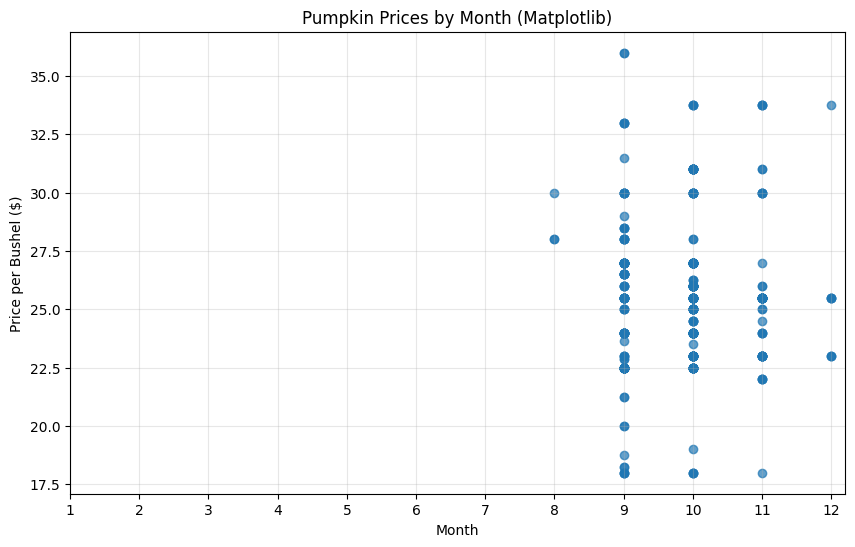

In [15]:
# Matplotlib scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pumpkins['Month'], pumpkins['Price per bushel'], alpha=0.7)
plt.title('Pumpkin Prices by Month (Matplotlib)')
plt.xlabel('Month')
plt.ylabel('Price per Bushel ($)')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.show()

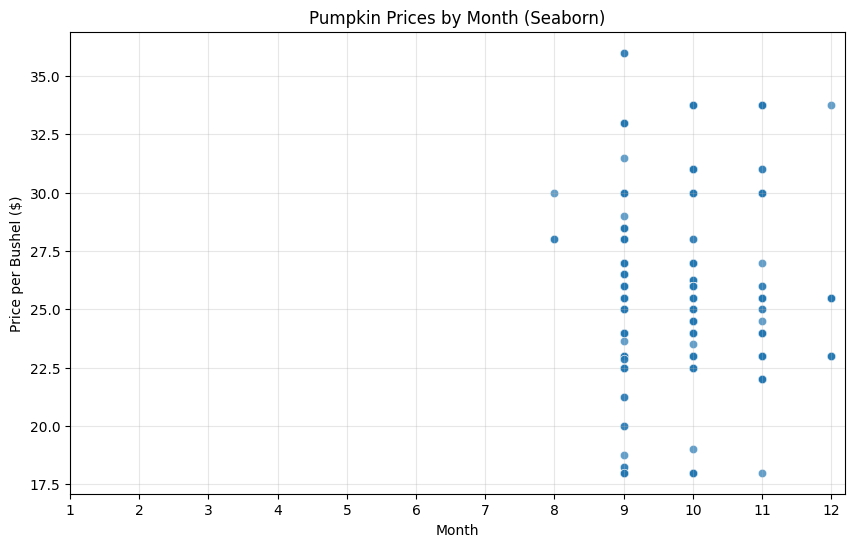

In [16]:
# Seaborn scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pumpkins, x='Month', y='Price per bushel', alpha=0.7)
plt.title('Pumpkin Prices by Month (Seaborn)')
plt.xlabel('Month')
plt.ylabel('Price per Bushel ($)')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_19188\3311592165.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(month_data, labels=range(1, 13))


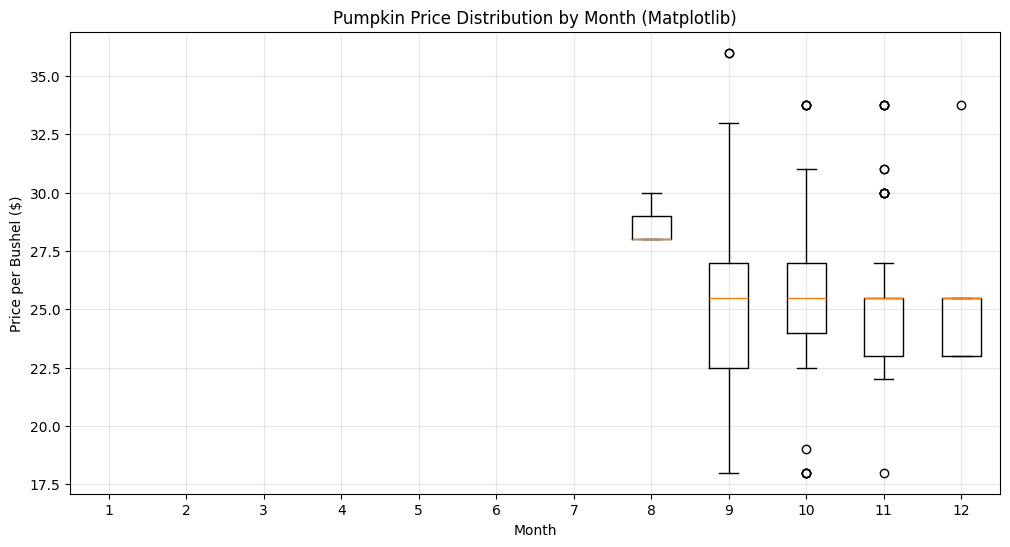

In [17]:
# Matplotlib box plot
plt.figure(figsize=(12, 6))
month_data = [pumpkins[pumpkins['Month'] == month]['Price per bushel'] for month in range(1, 13)]
plt.boxplot(month_data, labels=range(1, 13))
plt.title('Pumpkin Price Distribution by Month (Matplotlib)')
plt.xlabel('Month')
plt.ylabel('Price per Bushel ($)')
plt.grid(True, alpha=0.3)
plt.show()

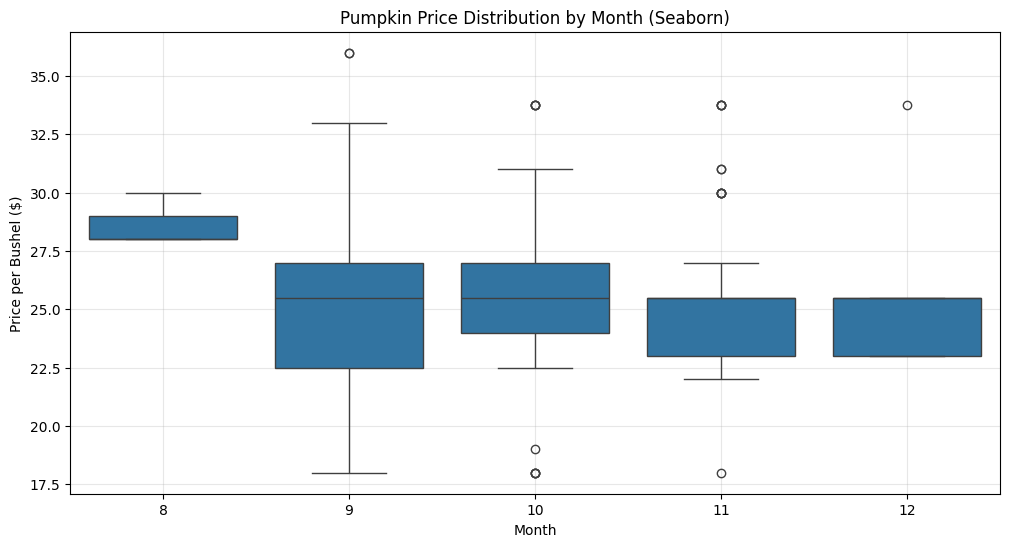

In [18]:
# Seaborn box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=pumpkins, x='Month', y='Price per bushel')
plt.title('Pumpkin Price Distribution by Month (Seaborn)')
plt.xlabel('Month')
plt.ylabel('Price per Bushel ($)')
plt.grid(True, alpha=0.3)
plt.show()

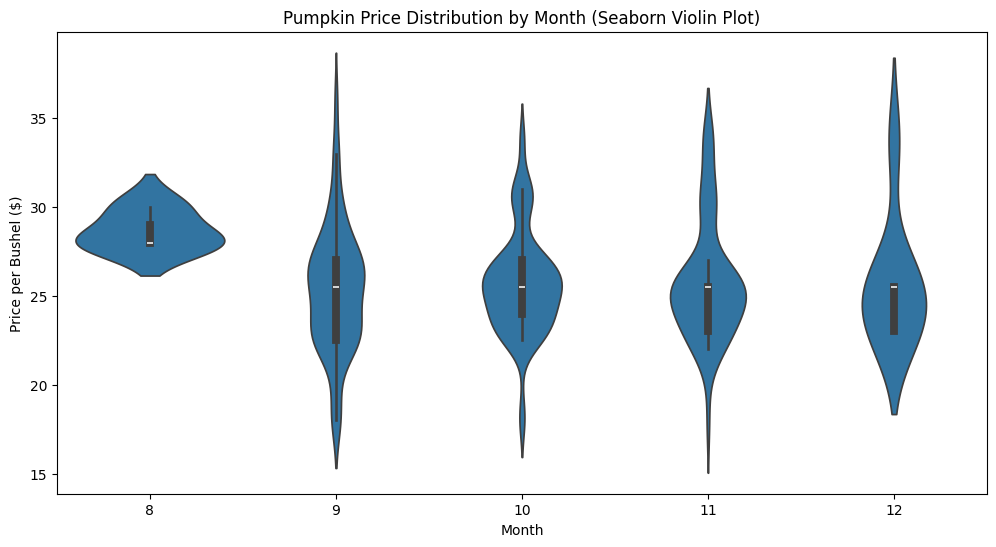

In [19]:
# Seaborn violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=pumpkins, x='Month', y='Price per bushel')
plt.title('Pumpkin Price Distribution by Month (Seaborn Violin Plot)')
plt.xlabel('Month')
plt.ylabel('Price per Bushel ($)')
plt.show()

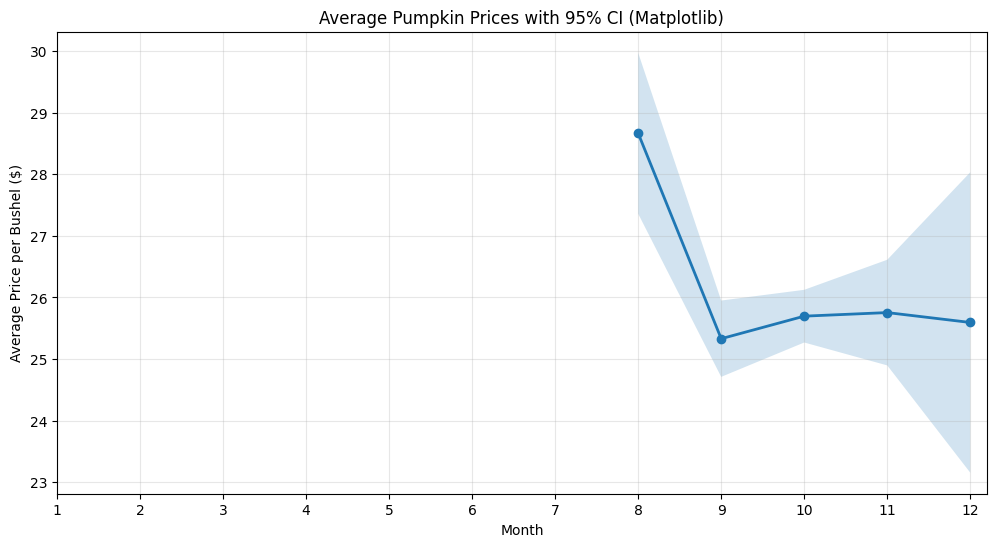

In [20]:
# Matplotlib - would need to calculate confidence intervals manually
monthly_avg = pumpkins.groupby('Month')['Price per bushel'].mean()
monthly_std = pumpkins.groupby('Month')['Price per bushel'].std()
monthly_count = pumpkins.groupby('Month')['Price per bushel'].count()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2)
plt.fill_between(monthly_avg.index, 
                monthly_avg - 1.96*monthly_std/np.sqrt(monthly_count),
                monthly_avg + 1.96*monthly_std/np.sqrt(monthly_count),
                alpha=0.2)
plt.title('Average Pumpkin Prices with 95% CI (Matplotlib)')
plt.xlabel('Month')
plt.ylabel('Average Price per Bushel ($)')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.show()

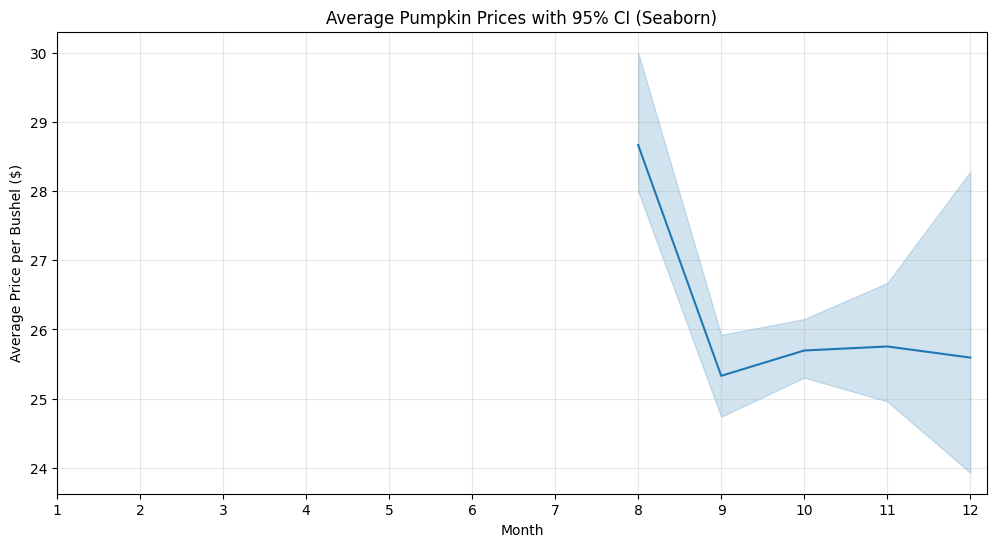

In [21]:
# Seaborn line plot with confidence intervals
plt.figure(figsize=(12, 6))
sns.lineplot(data=pumpkins, x='Month', y='Price per bushel', errorbar='ci')
plt.title('Average Pumpkin Prices with 95% CI (Seaborn)')
plt.xlabel('Month')
plt.ylabel('Average Price per Bushel ($)')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.show()

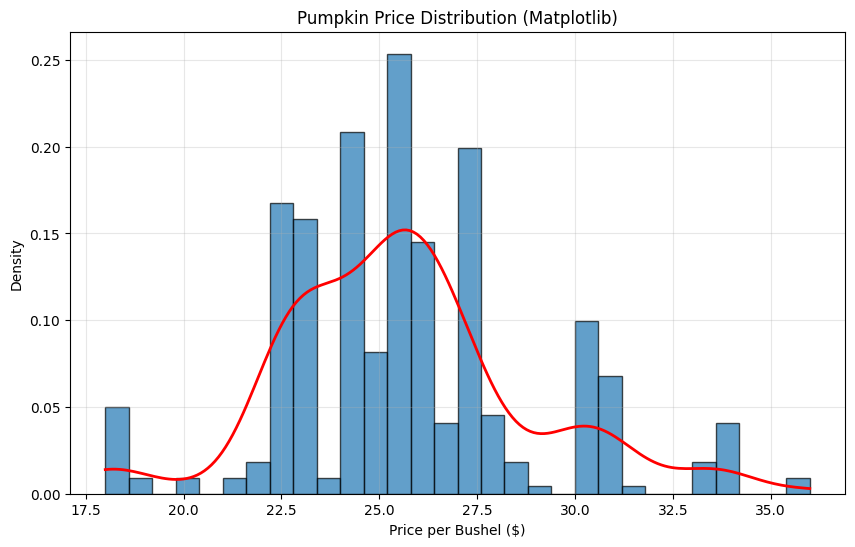

In [22]:
# Matplotlib histogram
plt.figure(figsize=(10, 6))
plt.hist(pumpkins['Price per bushel'], bins=30, density=True, alpha=0.7, edgecolor='black')

# Add density curve manually
from scipy.stats import gaussian_kde
density = gaussian_kde(pumpkins['Price per bushel'].dropna())
xs = np.linspace(pumpkins['Price per bushel'].min(), pumpkins['Price per bushel'].max(), 200)
plt.plot(xs, density(xs), 'r-', linewidth=2)

plt.title('Pumpkin Price Distribution (Matplotlib)')
plt.xlabel('Price per Bushel ($)')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

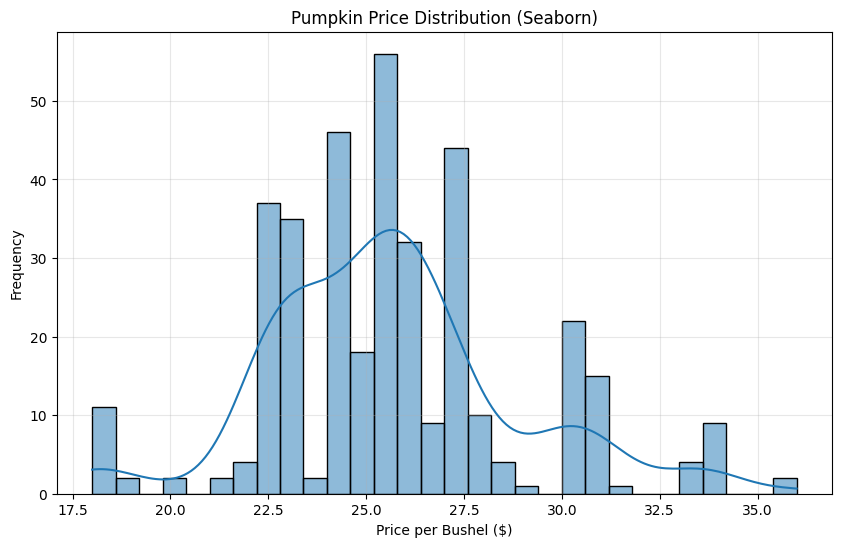

In [23]:
# Seaborn histogram with density curve
plt.figure(figsize=(10, 6))
sns.histplot(data=pumpkins, x='Price per bushel', kde=True, bins=30)
plt.title('Pumpkin Price Distribution (Seaborn)')
plt.xlabel('Price per Bushel ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

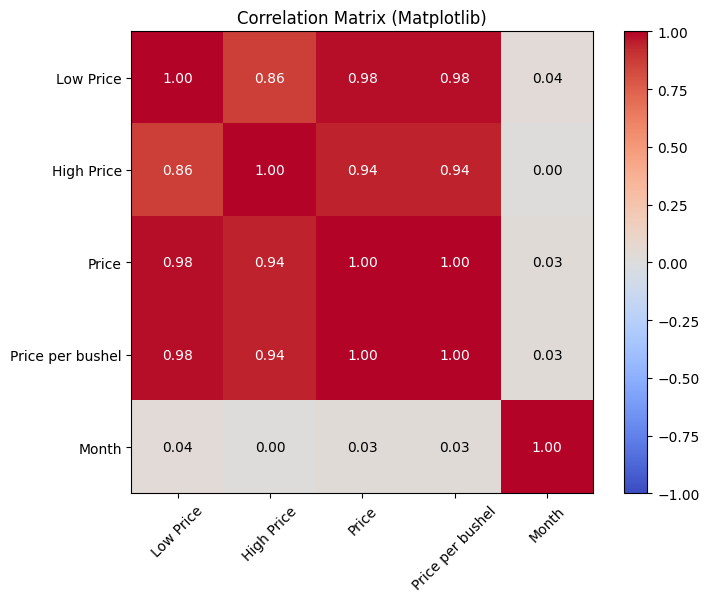

In [24]:
# Matplotlib heatmap (more complex)
corr_matrix = pumpkins[['Low Price', 'High Price', 'Price', 'Price per bushel', 'Month']].corr()

plt.figure(figsize=(8, 6))
im = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix (Matplotlib)')

# Add correlation values
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black')
plt.show()

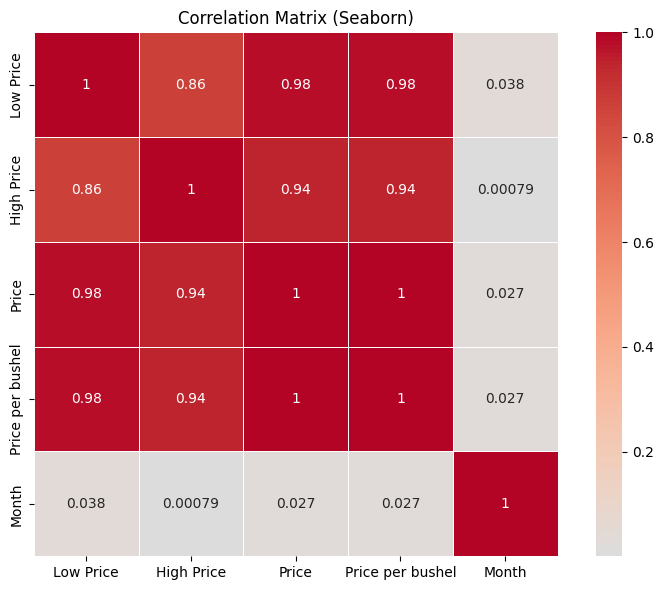

In [25]:
# Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
           square=True, linewidths=0.5)
plt.title('Correlation Matrix (Seaborn)')
plt.tight_layout()
plt.show()